In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torchvision

In [2]:
conv = nn.Conv2d(3, 2, kernel_size= 7, padding=3)


In [3]:
conv.weight

Parameter containing:
tensor([[[[-7.5994e-02,  2.2185e-02,  3.3067e-02, -3.1673e-02, -7.4239e-03,
            2.6252e-02,  1.8512e-02],
          [ 1.1957e-02,  6.1069e-02, -4.2487e-02, -2.5915e-02,  2.9461e-02,
           -7.2079e-02,  2.6607e-02],
          [-2.3769e-03, -3.3645e-03, -1.1090e-02, -6.6246e-02,  7.1286e-02,
           -5.5209e-02,  6.8239e-02],
          [-4.8162e-02, -1.7165e-02,  4.5315e-02, -1.7860e-02, -3.0457e-02,
           -3.5653e-02, -2.0471e-02],
          [-1.4344e-02, -5.8357e-02, -4.9070e-02, -3.5046e-02, -1.4993e-02,
            7.5948e-02, -4.0384e-02],
          [ 1.6600e-02,  2.1135e-02,  7.0120e-02, -3.3684e-02,  1.8564e-02,
            5.5806e-02,  5.4415e-02],
          [-9.6919e-03,  1.2092e-02,  6.1017e-02,  5.9138e-02, -3.6349e-02,
            1.6393e-02, -4.3193e-02]],

         [[ 5.9981e-02, -3.1190e-02, -8.2017e-02, -6.0588e-02, -7.8883e-02,
           -3.0382e-02, -3.0709e-02],
          [-4.7821e-02,  6.7888e-02,  4.5615e-02,  4.9080e-02,  

In [4]:
conv.bias

Parameter containing:
tensor([ 0.0005, -0.0591], requires_grad=True)

In [5]:
conv.weight.shape

torch.Size([2, 3, 7, 7])

In [6]:
!wget https://koreajoongangdaily.joins.com/data/photo/2022/08/22/49e685a8-7ce1-4821-ba7c-dbd1cdd830cd.jpg -O ive.jpg

--2023-08-17 00:03:25--  https://koreajoongangdaily.joins.com/data/photo/2022/08/22/49e685a8-7ce1-4821-ba7c-dbd1cdd830cd.jpg
Resolving koreajoongangdaily.joins.com (koreajoongangdaily.joins.com)... 218.145.68.148
Connecting to koreajoongangdaily.joins.com (koreajoongangdaily.joins.com)|218.145.68.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265970 (260K) [image/jpeg]
Saving to: ‘ive.jpg’

ive.jpg             100%[===================>] 259.74K   268KB/s    in 1.0s    

2023-08-17 00:03:26 (268 KB/s) - ‘ive.jpg’ saved [265970/265970]



In [7]:
ive = cv2.imread('ive.jpg')
ive.shape

(380, 560, 3)

In [8]:
input = ive.transpose(2, 0, 1) # c h w 순으로 입력 바꿈
input.shape

(3, 380, 560)

In [9]:
input = torch.tensor(input).float()
# input.reshape(1,3,380,560) #세로운 축 추가
#input = input.unsqueeze(0) #세로운 축 추가
input = input[None]  #세로운 축 추가
input.shape

torch.Size([1, 3, 380, 560])

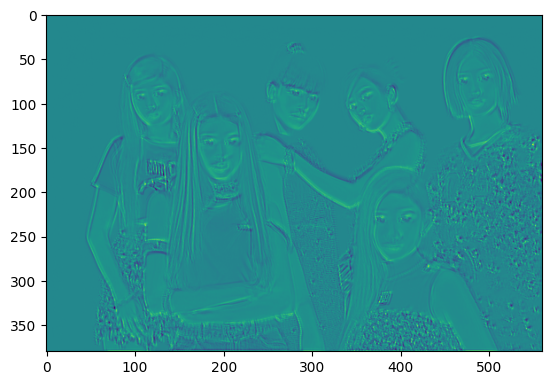

In [10]:
output = conv(input) #conv의 출력이  2 이므로 출력 shape이  1, 2, 380, 560
plt.imshow(output[0,0, :,:].detach())

In [11]:
kernel = torch.zeros(2, 3, 7, 7)
kernel[0, :, :, 3] = 1
kernel

tensor([[[[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.]],

         [[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.]],

         [[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.]]],


        [[[0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0

In [12]:
kernel[1, :, 3, :] = 1
kernel

tensor([[[[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.]],

         [[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.]],

         [[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0.]]],


        [[[0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1., 1

In [13]:
conv.weight.data = kernel

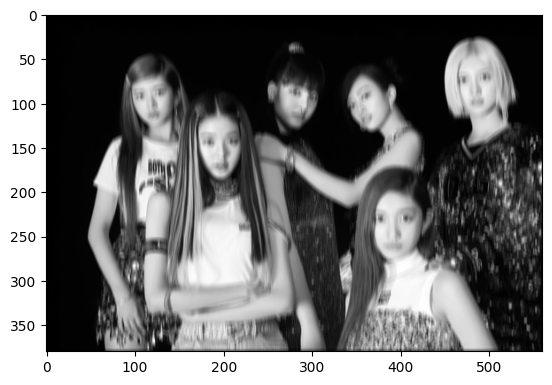

In [14]:
with torch.no_grad():
  output = conv(input)
plt.imshow(output[0,0,:,:], cmap = 'gray')

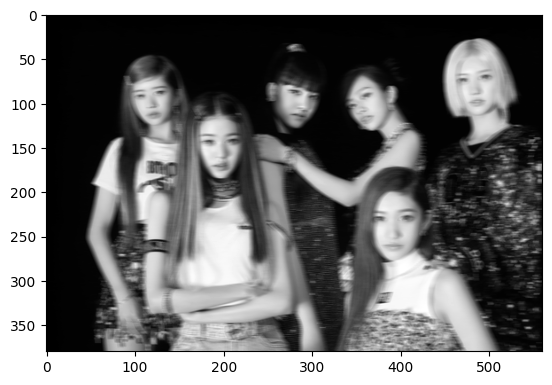

In [15]:
plt.imshow(output[0,1,:,:], cmap = 'gray')

In [16]:
import torchsummary
dummy = torch.randn(32, 1, 28,28)

model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size = 3, padding= 1, bias = False),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, kernel_size=3, padding=1, bias = False),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64, 128, kernel_size=3, padding = 1,  bias = False),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.Conv2d(128, 128, kernel_size=3, padding=1, bias = False),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.AvgPool2d(7), #torch.Size([32, 128, 1, 1])
    nn.Flatten(),
    nn.Linear(128,10)
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # cpu에서 GPU로 전환해줘야됨
model.to(device)
dummy = dummy.to(device)
opt = torch.optim.Adam(model.parameters())
torchsummary.summary(model, ( 1, 28, 28))
model(dummy).shape

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             288
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
         MaxPool2d-4           [-1, 32, 14, 14]               0
            Conv2d-5           [-1, 64, 14, 14]          18,432
       BatchNorm2d-6           [-1, 64, 14, 14]             128
              ReLU-7           [-1, 64, 14, 14]               0
         MaxPool2d-8             [-1, 64, 7, 7]               0
            Conv2d-9            [-1, 128, 7, 7]          73,728
      BatchNorm2d-10            [-1, 128, 7, 7]             256
             ReLU-11            [-1, 128, 7, 7]               0
           Conv2d-12            [-1, 128, 7, 7]         147,456
      BatchNorm2d-13            [-1, 128, 7, 7]             256
             ReLU-14            [-1, 12

torch.Size([32, 10])

In [17]:
data_train = torchvision.datasets.FashionMNIST('.', True, download= True)
data_valid = torchvision.datasets.FashionMNIST('.', False, download= True)

x_train = data_train.data
y_train = data_train.targets

x_valid = data_valid.data
y_valid = data_valid.targets


100%|██████████| 26421880/26421880 [00:02<00:00, 10445542.38it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 173853.83it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3269230.08it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21357346.18it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [18]:
x_train.shape

torch.Size([60000, 28, 28])

In [19]:
dataset_train =list(zip(x_train, y_train))
dataset_valid = list(zip(x_valid, y_valid))

def preproc(data):
  x_list = []
  y_list = []
  for x, y in data:
    x = x.unsqueeze(0) / 127.5 -1
    #x.unsqueeze(0).shape # 현재 shape은 28,28이므로  0번째에 차원추가  CNN 모델은 입력으로 NCHW 로 되어있음 따라서 reshape, unsqueeze 등 을 사용해서 shape을 맞추어줘야됨
    x_list.append(x)
    y_list.append(y)
  x_res = torch.stack(x_list)
  y_res = torch.stack(y_list)
  return x_res, y_res

loader_train = torch.utils.data.DataLoader(dataset_train, collate_fn = preproc, batch_size = 32, shuffle =True, drop_last= True, num_workers = 2)
loader_valid = torch.utils.data.DataLoader(dataset_train, collate_fn = preproc,  batch_size = 32,  num_workers = 2)

for x, y in loader_train:
  break

x.shape, y.shape



(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [20]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

In [21]:
a = torch.tensor([1,2,3], device = 'cuda')
b = torch.tensor([4, 5, 6], device = 'cuda')

a+b

tensor([5, 7, 9], device='cuda:0')

In [22]:
import torchsummary
dummy = torch.randn(32, 1, 28,28)

model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size = 3, padding= 1, bias = False),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, kernel_size=3, padding=1, bias = False),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64, 128, kernel_size=3, padding = 1,  bias = False),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.Conv2d(128, 128, kernel_size=3, padding=1, bias = False),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.AvgPool2d(7), #torch.Size([32, 128, 1, 1])
    nn.Flatten(),
    nn.Linear(128,10)
)

model.to(device)
opt = torch.optim.Adam(model.parameters())

In [23]:
loss_fn = nn.CrossEntropyLoss(label_smoothing= 0.3)


In [24]:
for epoch in range(20):
  model.train()
  step = 1
  loss_list =[]
  acc_list = []
  for x, y in loader_train:
    logit =model(x.to(device))
    loss = loss_fn(logit, y.to(device))
    opt.zero_grad()
    loss.backward()
    opt.step()

    loss_list.append(loss.item())
    pred = logit.argmax(dim = 1).to('cpu')
    acc = (pred == y).float().mean()
    acc_list.append(acc.item())

    print(f'\r epoch = {epoch} step = {step}  loss{np.mean(loss_list)}  acc = {np.mean(acc_list):.4f}', end = '')
    step +=1
  print()
  model.eval()
  step = 1
  loss_list =[]
  acc_list = []
  for x, y in loader_valid:
    logit =model(x.to(device))
    loss = loss_fn(logit, y.to(device))
    opt.zero_grad()
    loss.backward()
    opt.step()

    loss_list.append(loss.item())
    pred = logit.argmax(dim = 1).to('cpu') # cpu로 전환하여 y 값을 비교후 acc를 추출하여 학습
    acc = (pred == y).float().mean()
    acc_list.append(acc.item())

    print(f'\r  {" "* 50} step = {step}  loss{np.mean(loss_list)}  acc = {np.mean(acc_list):.4f}', end ='')
    step +=1
  print()


 epoch = 0 step = 1875  loss1.4143153025945028  acc = 0.8538
                                                     step = 1875  loss1.3524103368123372  acc = 0.8925
 epoch = 1 step = 1875  loss1.3340977350234986  acc = 0.9069
                                                     step = 1875  loss1.3201356686909993  acc = 0.9129
 epoch = 2 step = 1875  loss1.3128236234664916  acc = 0.9205
                                                     step = 1875  loss1.302473310025533  acc = 0.9243
 epoch = 3 step = 1875  loss1.2973782934824625  acc = 0.9320
                                                     step = 1875  loss1.2892147695541383  acc = 0.9338
 epoch = 4 step = 1875  loss1.2855052930196127  acc = 0.9394
                                                     step = 1875  loss1.2776010889053344  acc = 0.9436
 epoch = 5 step = 1875  loss1.2758299876530965  acc = 0.9484
                                                     step = 1875  loss1.2681763804117838  acc = 0.9518
 epoch = 6 step =

## Resnet code

In [28]:
input = torch.randn(32, 16, 28, 28)

# seq = nn.Sequential(
#     nn.Conv2d(16,16, kernel_size = 3, padding = 1),
#     nn.BatchNorm2d(16),
#     nn.ReLU(),
#     nn.Conv2d(16, 16, kernel_size = 3, padding=1),
#     nn.BatchNorm2d(16)
# )

# z = seq(input)
# z =  z + input
# z = nn.functional.relu(z)
# z.shape

class ResBlock(nn.Module):
  def __init__(self, in_ch, out_ch, stride = 1):
    super().__init__()
    self.seq = nn.Sequential(
      nn.Conv2d(in_ch,out_ch, kernel_size = 3, padding = 1, bias = False, stride = stride),
      nn.BatchNorm2d(out_ch),
      nn.ReLU(),
      nn.Conv2d(out_ch, out_ch, kernel_size = 3, padding=1, bias = False),
      nn.BatchNorm2d(out_ch)
      )
    side_modules = []
    if in_ch != out_ch or stride != 1:
      side_modules.append(nn.Conv2d(in_ch, out_ch, kernel_size = 1, stride = stride)) #pointwise conv 연산 잔차연결시 shape을 맞추어줌
      side_modules.append(nn.BatchNorm2d(out_ch))

    self.side = nn.Sequential(*side_modules)#in_ch와 out_ch가 다르거나 stride가 1이 아닌 경우에 side_modules 리스트에 모듈들을 추가하는 방식으로 동적으로 조합함

  def forward(self, input):

    z = self.seq(input)
    z =  z + self.side(input)
    z = nn.functional.relu(z)
    return z


res = ResBlock(16, 32, stride =2)
res(input).shape


torch.Size([32, 32, 14, 14])

In [32]:
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size = 3, padding= 1, bias = False),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    ResBlock(32, 32),
    ResBlock(32, 64, stride = 2),
    ResBlock(64, 64),
    ResBlock(64, 128, stride = 2),
    ResBlock(128, 128),

    nn.AvgPool2d(7), #torch.Size([32, 128, 1, 1])
    nn.Flatten(),
    nn.Linear(128,10)
)
model.to(device)
opt = torch.optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss(label_smoothing= 0.3)

In [33]:
for epoch in range(20):
  model.train()
  step = 1
  loss_list =[]
  acc_list = []
  for x, y in loader_train:
    logit =model(x.to(device))
    loss = loss_fn(logit, y.to(device))
    opt.zero_grad()
    loss.backward()
    opt.step()

    loss_list.append(loss.item())
    pred = logit.argmax(dim = 1).to('cpu')
    acc = (pred == y).float().mean()
    acc_list.append(acc.item())

    print(f'\r epoch = {epoch} step = {step}  loss{np.mean(loss_list)}  acc = {np.mean(acc_list):.4f}', end = '')
    step +=1
  print()
  model.eval()
  step = 1
  loss_list =[]
  acc_list = []
  for x, y in loader_valid:
    logit =model(x.to(device))
    loss = loss_fn(logit, y.to(device))
    opt.zero_grad()
    loss.backward()
    opt.step()

    loss_list.append(loss.item())
    pred = logit.argmax(dim = 1).to('cpu') # cpu로 전환하여 y 값을 비교후 acc를 추출하여 학습
    acc = (pred == y).float().mean()
    acc_list.append(acc.item())

    print(f'\r  {" "* 50} step = {step}  loss{np.mean(loss_list)}  acc = {np.mean(acc_list):.4f}', end ='')
    step +=1
  print()


 epoch = 0 step = 1875  loss1.3974769954681396  acc = 0.8595
                                                     step = 1875  loss1.3254328756332396  acc = 0.9044
 epoch = 1 step = 1875  loss1.3036617277781168  acc = 0.9211
                                                     step = 1875  loss1.2881564149856568  acc = 0.9293
 epoch = 2 step = 1875  loss1.2763932229359944  acc = 0.9401
                                                     step = 1875  loss1.2627445295333863  acc = 0.9467
 epoch = 3 step = 1875  loss1.2554879282633464  acc = 0.9544
                                                     step = 1875  loss1.2413702383041383  acc = 0.9625
 epoch = 4 step = 1875  loss1.2374812430063884  acc = 0.9674
                                                     step = 1875  loss1.2232981727600098  acc = 0.9765
 epoch = 5 step = 1875  loss1.2215067047119141  acc = 0.9788
                                                     step = 1875  loss1.2096736907323202  acc = 0.9849
 epoch = 6 step 